In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
data = {
    "post_id": range(1, 11),
    "caption": [
        "Love this amazing sunset! #nature #beautiful",
        "New travel vlog is live! #travel #adventure",
        "Workout done ✅ Feeling strong #fitness #motivation",
        "Delicious homemade pasta today 🍝 #foodie",
        "Exploring new tech trends #technology #AI",
        "Sunday vibes 😎 #relax #weekend",
        "Big news coming soon... stay tuned! #announcement",
        "Great team outing yesterday #friends #fun",
        "Healthy lifestyle matters #wellness #health",
        "Learning data science is fun! #python #datascience"
    ],
    "likes": [150, 220, 300, 180, 250, 100, 400, 170, 210, 350],
    "comments": [20, 35, 40, 25, 30, 15, 50, 18, 22, 45],
    "time_posted": [
        "12:00", "18:00", "07:00", "20:00", "15:00",
        "10:00", "21:00", "19:00", "08:00", "17:00"
    ]
}

df = pd.DataFrame(data)

# Engagement Rate = (Likes + Comments)
df["engagement"] = df["likes"] + df["comments"]

print("📊 Instagram Sample Dataset:")
print(df.head())

📊 Instagram Sample Dataset:
   post_id                                            caption  likes  \
0        1       Love this amazing sunset! #nature #beautiful    150   
1        2        New travel vlog is live! #travel #adventure    220   
2        3  Workout done ✅ Feeling strong #fitness #motiva...    300   
3        4           Delicious homemade pasta today 🍝 #foodie    180   
4        5          Exploring new tech trends #technology #AI    250   

   comments time_posted  engagement  
0        20       12:00         170  
1        35       18:00         255  
2        40       07:00         340  
3        25       20:00         205  
4        30       15:00         280  


/tmp/ipython-input-1196177709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="post_id", y="engagement", data=df, palette="viridis")


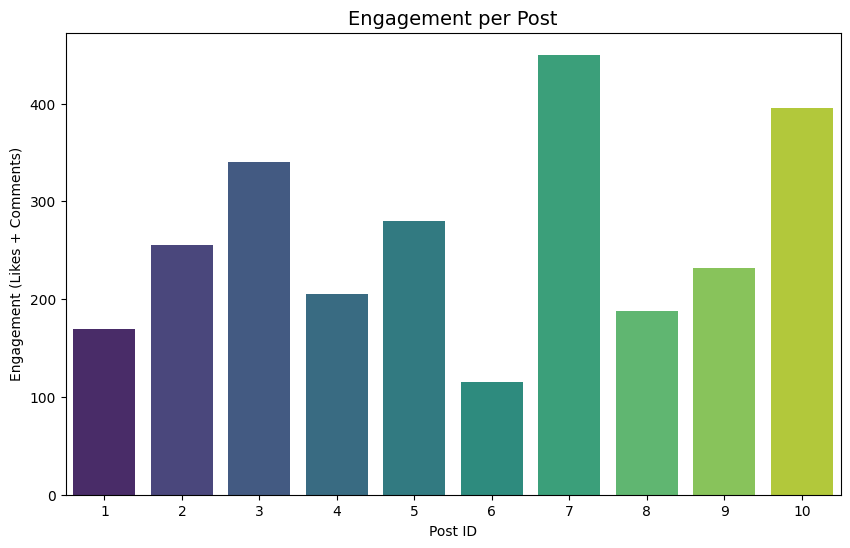

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="post_id", y="engagement", data=df, palette="viridis")
plt.title("Engagement per Post", fontsize=14)
plt.xlabel("Post ID")
plt.ylabel("Engagement (Likes + Comments)")
plt.show()

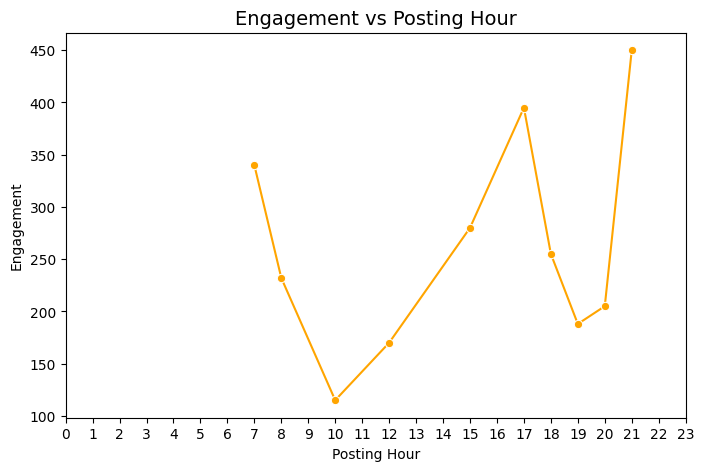

In [ ]:
df["hour"] = df["time_posted"].str.split(":").str[0].astype(int)

plt.figure(figsize=(8,5))
sns.lineplot(x="hour", y="engagement", data=df, marker="o", color="orange")
plt.title("Engagement vs Posting Hour", fontsize=14)
plt.xlabel("Posting Hour")
plt.ylabel("Engagement")
plt.xticks(range(0,24))
plt.show()

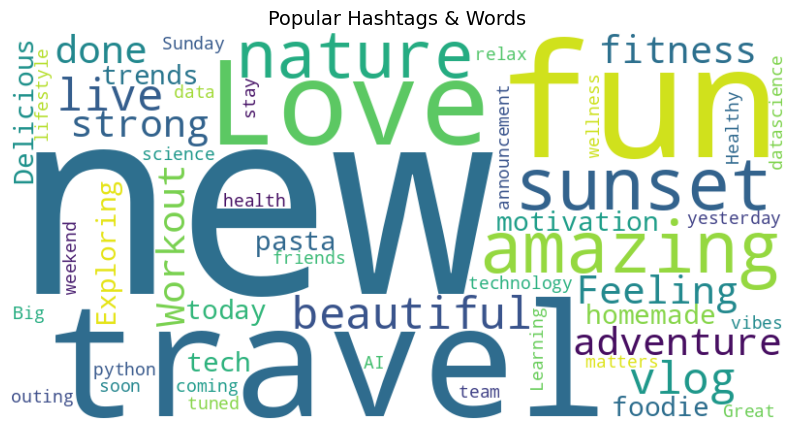

In [ ]:
all_text = " ".join(df["caption"])
wordcloud = WordCloud(width=800, height=400, background_color="white",
                      colormap="viridis").generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Popular Hashtags & Words", fontsize=14)
plt.show()

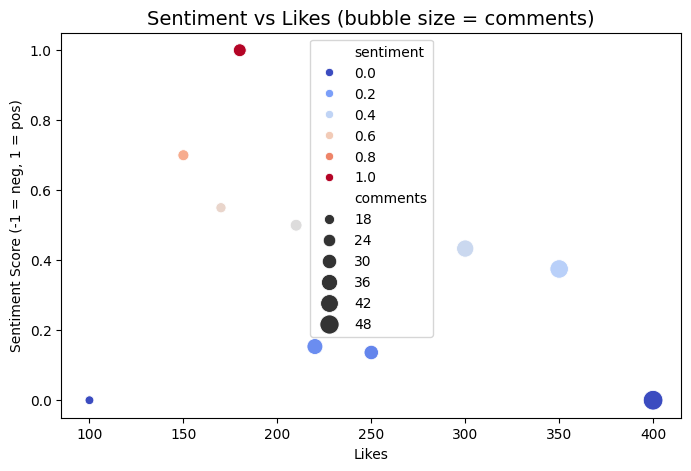


📝 Sentiment Analysis Results:
                                             caption  sentiment
0       Love this amazing sunset! #nature #beautiful   0.700000
1        New travel vlog is live! #travel #adventure   0.153409
2  Workout done ✅ Feeling strong #fitness #motiva...   0.433333
3           Delicious homemade pasta today 🍝 #foodie   1.000000
4          Exploring new tech trends #technology #AI   0.136364
5                     Sunday vibes 😎 #relax #weekend   0.000000
6  Big news coming soon... stay tuned! #announcement   0.000000
7          Great team outing yesterday #friends #fun   0.550000
8        Healthy lifestyle matters #wellness #health   0.500000
9  Learning data science is fun! #python #datasci...   0.375000


In [ ]:
df["sentiment"] = df["caption"].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.scatterplot(x="likes", y="sentiment", size="comments",
                data=df, hue="sentiment", palette="coolwarm", sizes=(40,200))
plt.title("Sentiment vs Likes (bubble size = comments)", fontsize=14)
plt.xlabel("Likes")
plt.ylabel("Sentiment Score (-1 = neg, 1 = pos)")
plt.show()

print("\n📝 Sentiment Analysis Results:")
print(df[["caption","sentiment"]])


In [ ]:
print("\n🔎 Insights:")
print("1. Best engagement time observed around:", df.loc[df['engagement'].idxmax(), "time_posted"])
print("2. Post with highest engagement:", df.loc[df['engagement'].idxmax(), "caption"])
print("3. Average sentiment score:", round(df["sentiment"].mean(),2))


🔎 Insights:
1. Best engagement time observed around: 21:00
2. Post with highest engagement: Big news coming soon... stay tuned! #announcement
3. Average sentiment score: 0.38
